# Practice Exercise Linear Regression
Welcome to the practice exercise on Linear Regression. We strongly recommend you try out all the questions/steps mentioned here and refer to the solution notebook later.

## Case Study: Boston Housing Price Prediction

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.


**Importing Libraries**

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### <a id = "link1">Load the dataset</a>

In [13]:
ds = pd.read_csv('Boston.csv')
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [5]:
ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [6]:
ds.shape

(506, 13)

**Get the info data types column wise**

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Get summary statistics around the numerical columns**

In [11]:
ds.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Univariate and Bivariate Analysis
Plot the distplots for the features and then plot scatterplots for features and the target variable 

To do - Identify insights if any from the distributuions.

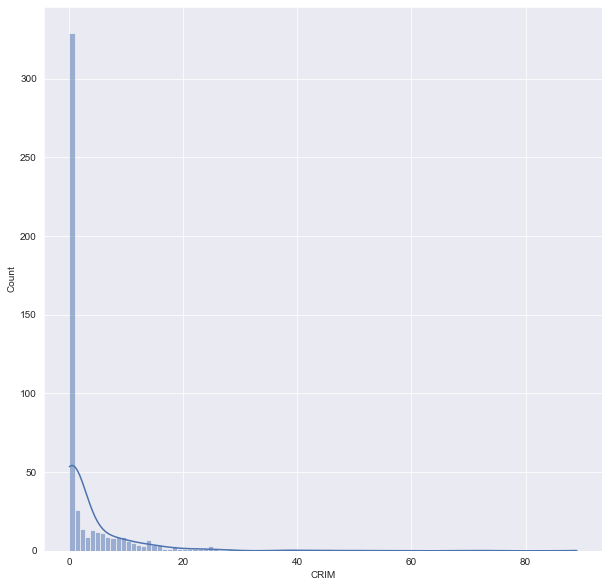

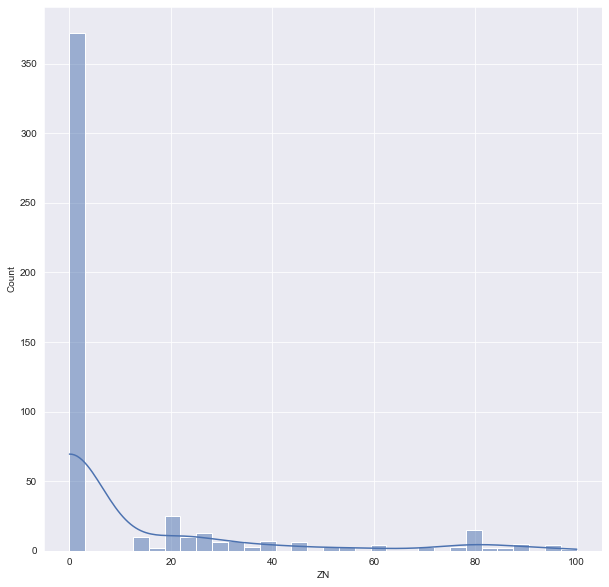

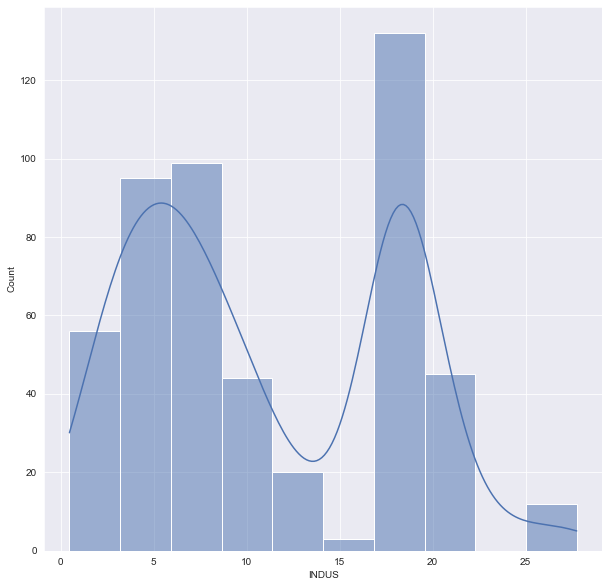

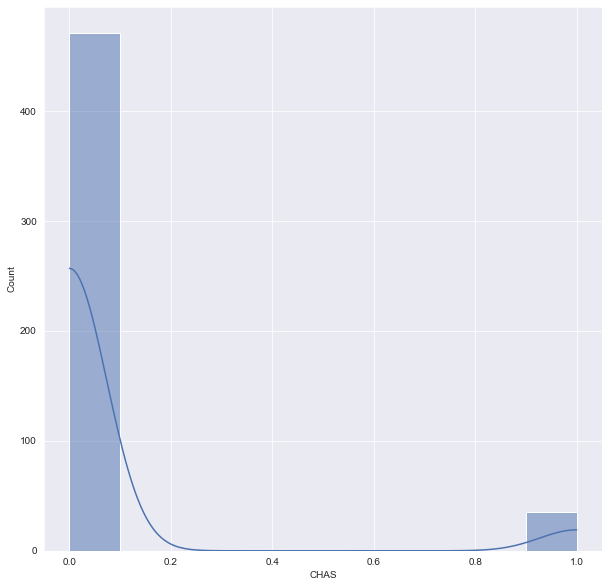

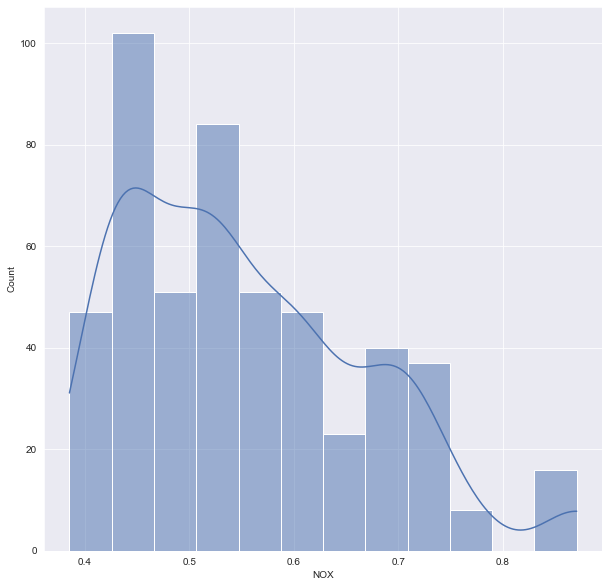

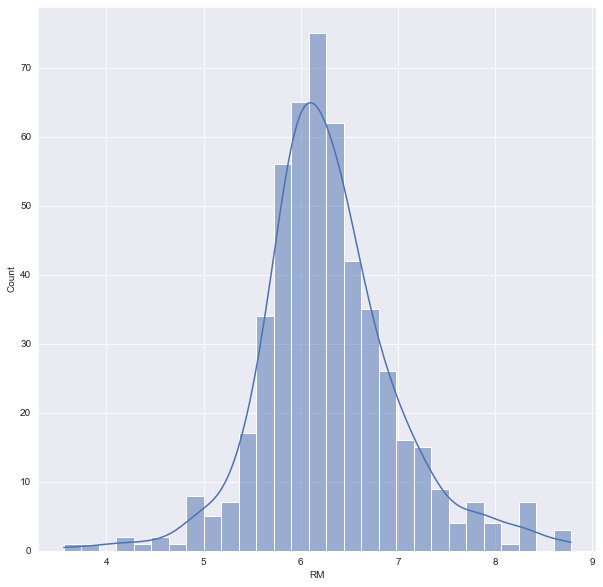

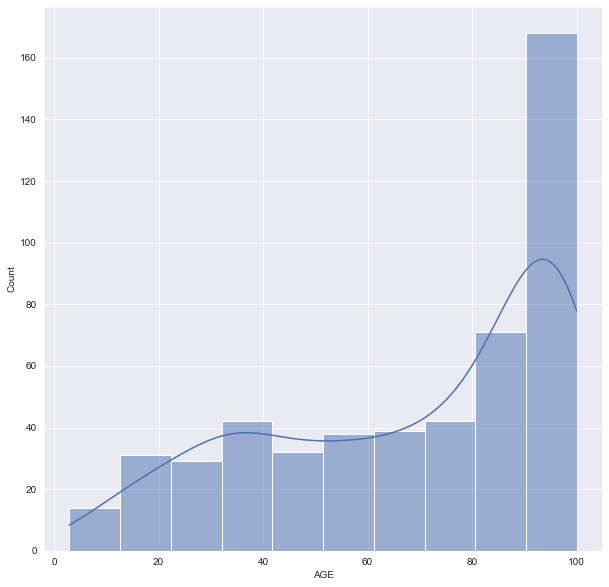

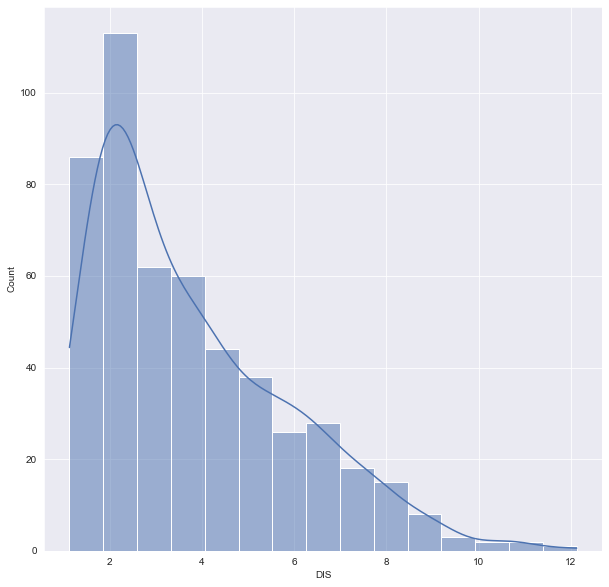

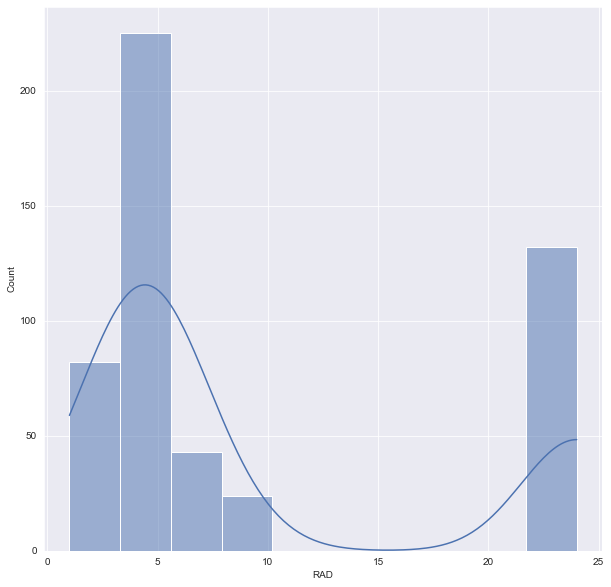

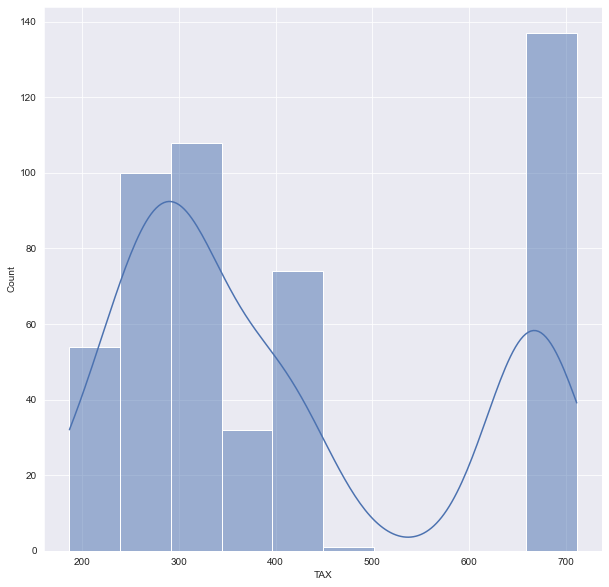

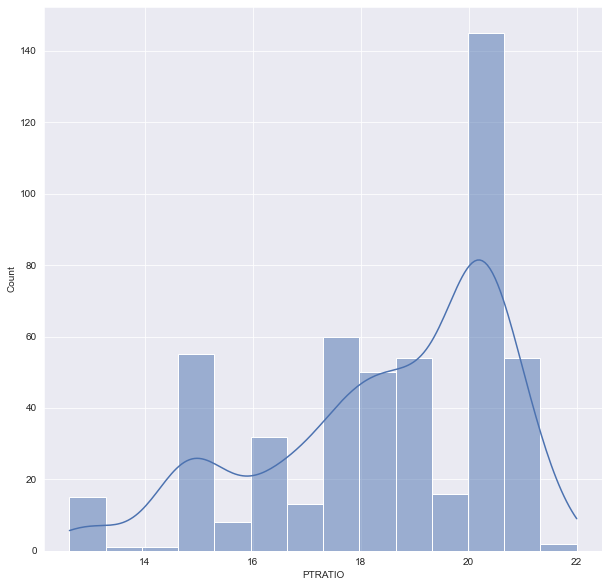

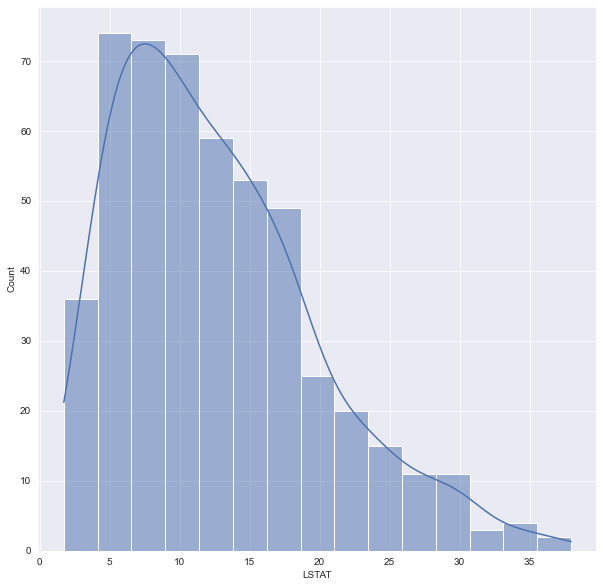

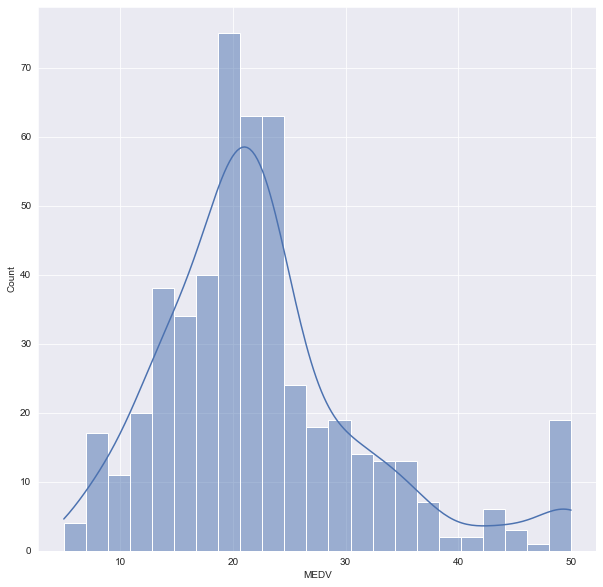

In [23]:
for i in ds.columns:
    sns.set({'figure.figsize': (10,10)})
    sns.histplot(ds[i], kde=True)
    plt.show()

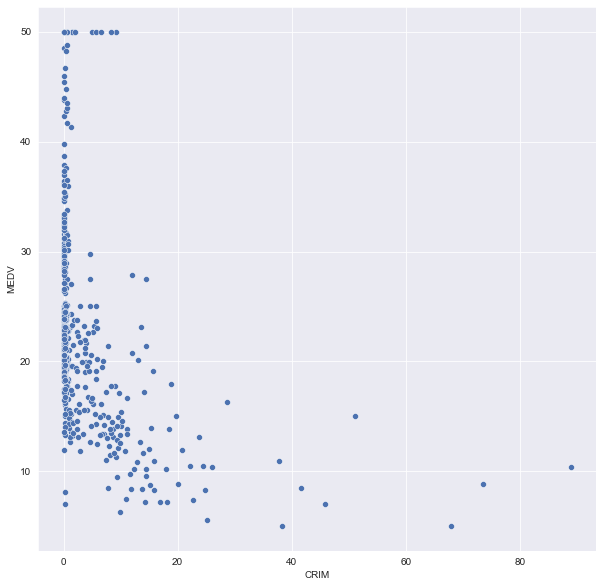

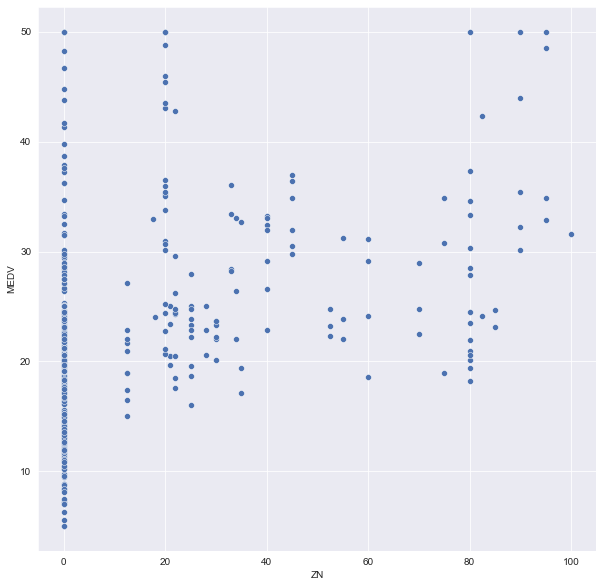

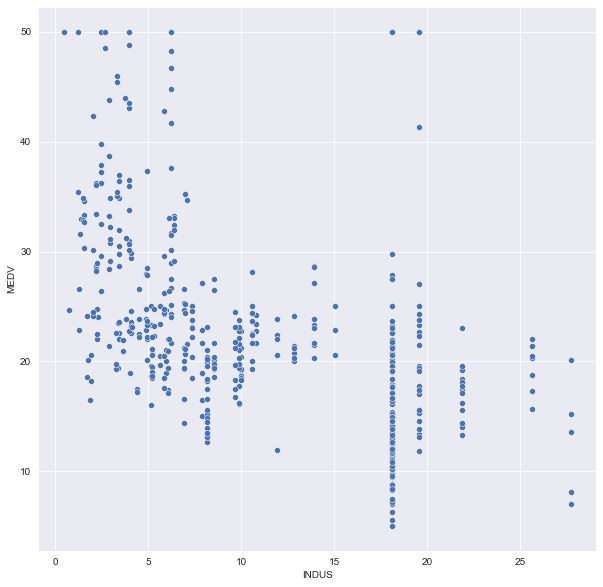

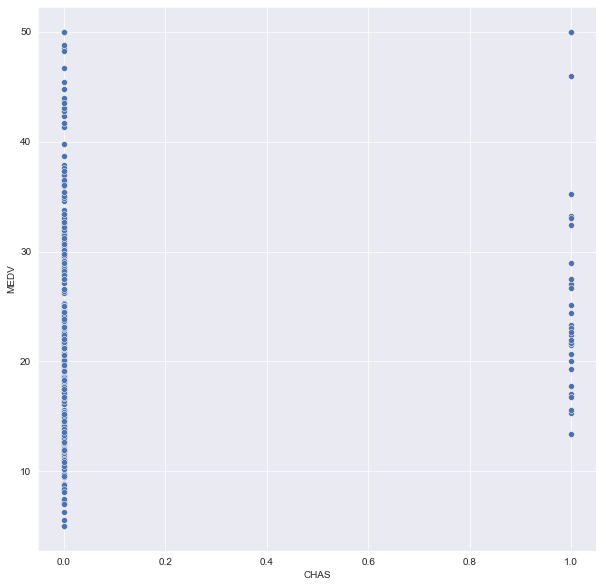

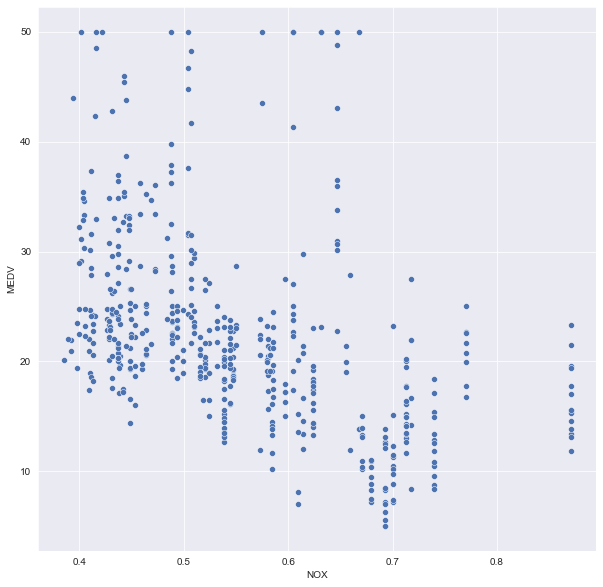

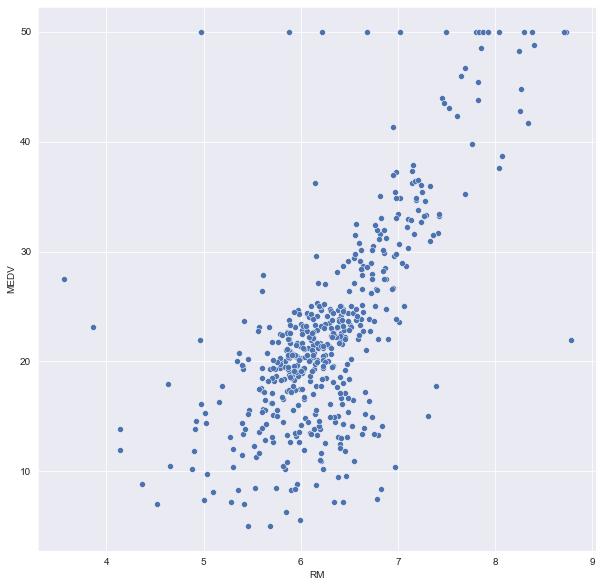

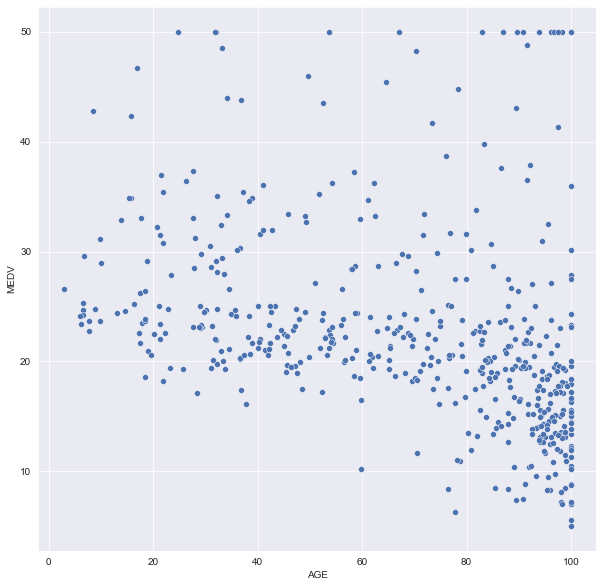

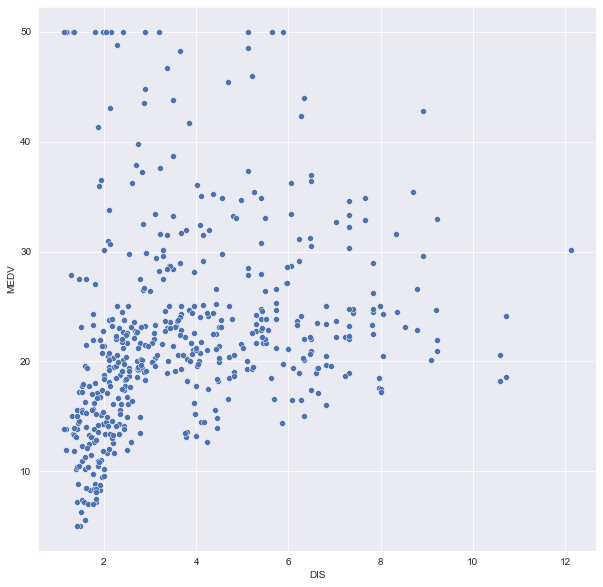

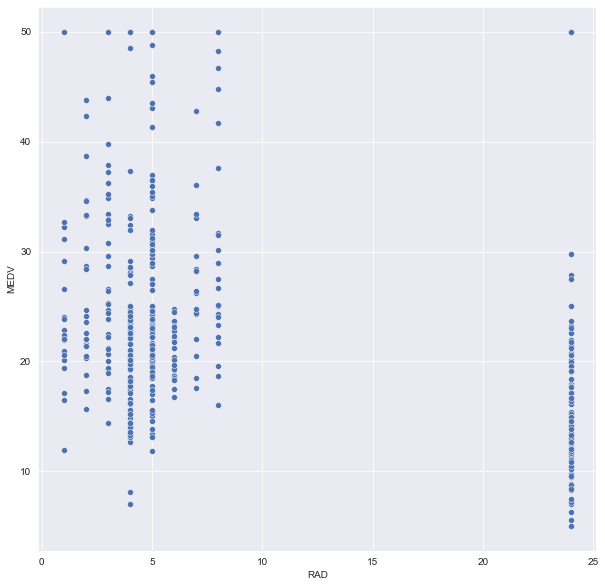

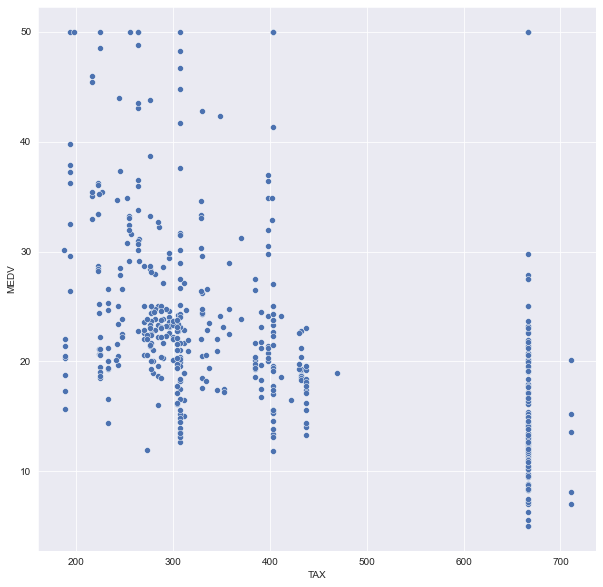

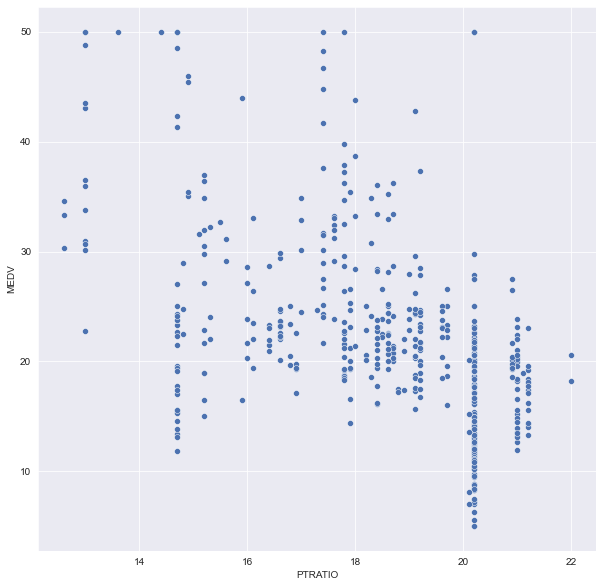

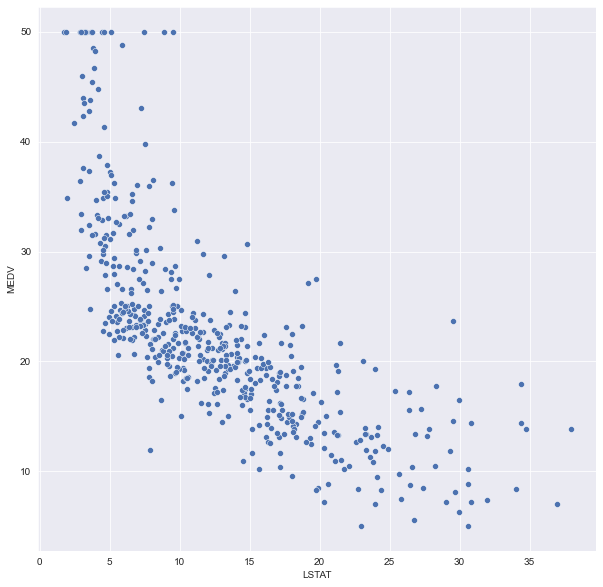

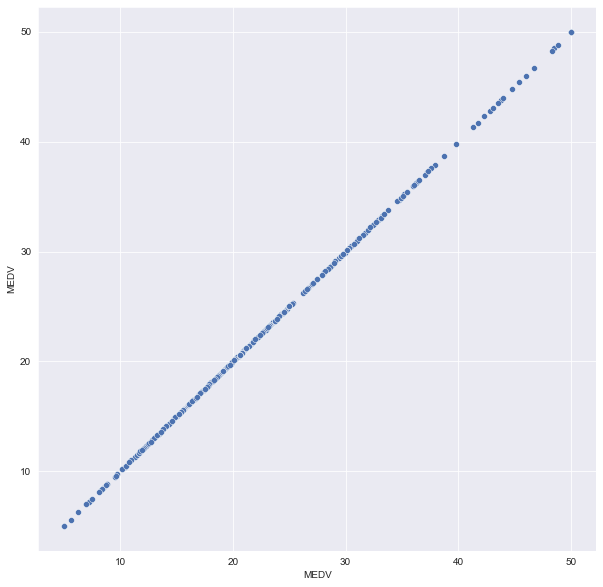

In [26]:
for i in ds.columns:
    plt.figure(figsize = (10,10))
    sns.scatterplot(x=ds[i], y = ds['MEDV'])
    plt.show()

**Get the Correlation Heatmap**

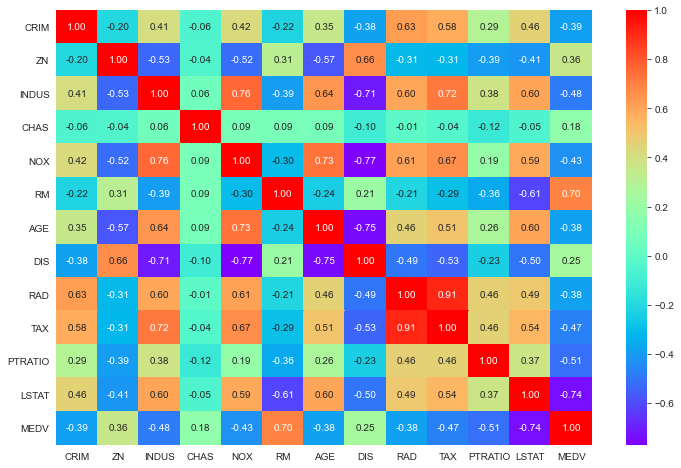

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(), annot=True, fmt='.2f', cmap='rainbow',)
plt.show()

In [33]:
# Let us create a new feature using the TAX and RAD.
ds['Rad/Tax'] = ds['RAD']/ds['TAX']

### <a id = "link2">Split the dataset</a>
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [35]:
Y = ds['MEDV']

In [37]:
X = ds.drop(columns={'MEDV'})

In [40]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Rad/Tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0.003378
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0.008264
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0.008264
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0.013514
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,0.013514
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,0.003663
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,0.003663
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,0.003663
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,0.003663


In [41]:
ds

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Rad/Tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0.003378
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0.008264
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0.008264
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0.013514
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0.013514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0.003663
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0.003663
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0.003663
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0.003663


In [39]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [48]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Rad/Tax
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,8.26,0.013029
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,14.44,0.028169
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,21.24,0.036036
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,4.32,0.011905
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,7.12,0.036036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,9.25,0.003175
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52,0.013115
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,19.37,0.036036
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,10.88,0.026059


In [49]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Rad/Tax
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,18.4,7.53,0.031532
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,17.6,7.18,0.013514
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,18.80,0.012876
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,8.10,0.011594
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,10.19,0.036036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,21.32,0.036036
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,6.65,0.007246
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188,19.1,17.93,0.010638
260,0.54011,20.0,3.97,0,0.647,7.203,81.8,2.1121,5,264,13.0,9.59,0.018939


In [50]:
y_train

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: MEDV, Length: 354, dtype: float64

In [51]:
y_test

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
467    19.1
95     28.4
122    20.5
260    33.8
23     14.5
Name: MEDV, Length: 152, dtype: float64

### <a id = "link3">Using Linear Model from Scikit learn library</a>

**Fit the model to the training set**

In [57]:
regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(X_train, y_train)

LinearRegression()

In [55]:
regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(X_train, y_train)

LinearRegression()

**Get the score on training set**

In [58]:
print('The coefficient of determination R^2 of the prediction on Train set', regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.7077132931309869


**Write your own function for the r-squared score**

In [80]:
def r_squared(model, X, y):
    y_mean = y_train.mean()
    SST = ((y_train - y_mean) ** 2).sum()
    SSE = ((y_train - regression_model.predict(X_train)) ** 2).sum()
    return SSE, SST, r_square

SSE, SST, r_square = r_squared(regression_model, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("r_square: ", r_square)

SSE:  8400.59131142169
SST:  28740.928389830508
r_square:  0.7077132931309869


**Get the score on test set**

In [81]:
print('The coefficient of determination R^2 of the prediction on Train set', regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Train set 0.7747487100790016


**Get the RMSE on test set**

In [82]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is", np.sqrt(mean_squared_error(y_test, regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 4.543708996703914


**Get model Coefficients**

In [85]:
a = regression_model.coef_
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = regression_model.coef_
coeff_data['Feature'] = X_train.columns
coeff_data = coeff_data.append({'Coeff': regression_model.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

,Coefs,Feature,Coeff
0,-0.111646,CRIM,NaN
1,0.063623,ZN,NaN
2,0.058160,INDUS,NaN
3,2.481265,CHAS,NaN
4,-22.288445,NOX,NaN
5,2.705046,RM,NaN
6,0.004333,AGE,NaN
7,-1.553844,DIS,NaN
8,0.163573,RAD,NaN
9,-0.008756,TAX,NaN


**Automate the equation of the fit**

In [90]:
Equation = "Price ="
print(Equation, end= '\t')
for i in range(0, 13):
    if(i!=12):
        print("(",coeff_data.iloc[i].Coefs,")","*", coeff_data.iloc[i].Feature,"+", end = '  ')
        print("\n")
    else:
        print(coeff_data.iloc[i].Coefs)

Price =	( -0.1116455734870058 ) * CRIM +  

( 0.0636226029154487 ) * ZN +  

( 0.05816017806553465 ) * INDUS +  

( 2.4812645928411254 ) * CHAS +  

( -22.28844492809687 ) * NOX +  

( 2.705045969347994 ) * RM +  

( 0.0043332061246766805 ) * AGE +  

( -1.5538441948939106 ) * DIS +  

( 0.16357314875579734 ) * RAD +  

( -0.008756354173498427 ) * TAX +  

( -0.9766725794264158 ) * PTRATIO +  

( -0.584633369854607 ) * LSTAT +  

72.92287256820521


## <a id = "link4">Bonus: Using Statsmodels OLS</a>

In [91]:
X_con=sm.add_constant(X)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, Y, test_size=0.30, random_state=1)

**Make the linear model using OLS**

In [93]:
model = sm.OLS(y_trainc,X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     63.33
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.66e-82
Time:                        08:35:51   Log-Likelihood:                -1062.8
No. Observations:                 354   AIC:                             2154.
Df Residuals:                     340   BIC:                             2208.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3960      6.555      7.383      0.000      35.502      61.290
CRIM          -0.1116      0.043     -2.585      0.010      -0.197      -0.027
ZN             0.0636      0.019      3.344      0.001       0.026       0.101
INDUS          0.0582      0.077      0.751      0.453      -0.094       0.210
CHAS           2.4813      0.986      2.517      0.012       0.542       4.421
NOX          -22.2884      4.700     -4.742      0.000     -31.534     -13.043
RM             2.7050      0.521      5.191      0.000       1.680       3.730
AGE            0.0043      0.017      0.261      0.795      -0.028       0.037
DIS           -1.5538      0.260     -5.972      0.000      -2.066      -1.042
RAD            0.1636      0.232      0.705      0.481      -0.293       0.620
TAX           -0.0088      0.007     -1.344      0.180      -0.022       0.004
PTRATIO       -0.9767      0.173     -5.650      0.000      -1.317      -0.637
LSTAT         -0.5846      0.062     -9.500      0.000      -0.706      -0.464
Rad/Tax       72.9229    115.940      0.629      0.530    -155.127     300.973
==============================================================================
Omnibus:                      135.944   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.381
Skew:                           1.641   Prob(JB):                    1.53e-121
Kurtosis:                       8.191   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Get the value of coefficient of determination**

In [94]:
print('The variation in the independent variable which is explained by the dependent variable is','\n',model.rsquared*100,'%')

The variation in the independent variable which is explained by the dependent variable is 
 70.77132931309868 %


**Get the Predictions on test set**

In [95]:
ypred = model.predict(X_testc)

**Calculate MSE for training set**

In [102]:
mse=mean_squared_error(y_trainc, model.predict(X_trainc))
mse

23.730483930569747

**Get the RMSE on training set**

In [103]:
print("The Root Mean Square Error (RMSE) of the model for Traning set is", np.sqrt(mse))

The Root Mean Square Error (RMSE) of the model for Traning set is 4.871394454421623


**Get the RMSE on test set**

In [104]:
print("The Root Mean Square Error (RMSE) of the model for testing set is", np.sqrt(mean_squared_error(y_test, ypred)))

The Root Mean Square Error (RMSE) of the model for testing set is 4.543708996703849
